In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
ven_info = pd.read_csv("image_data/venomous_status_metadata.csv",
                       names=["nid", "class_id", "ven"], header=0)
train_info = pd.read_csv("image_data/train_images_metadata.csv", index_col=0)

relevant = train_info[["image_path", "class_id"]].merge(ven_info, on="class_id")
n_classes = ven_info['class_id'].nunique()
print(f"Number of classes: {n_classes}")

train_paths, test_val_paths = train_test_split(relevant, test_size=0.1, random_state=42) # does shuffle
val_paths, test_paths = train_test_split(test_val_paths, test_size=0.5, random_state=42) # does shuffle

Number of classes: 296


In [4]:
y_pred = np.load("train_test_preds.npy")
y_pred_idx = np.argmax(y_pred, axis=1)
train_paths, test_val_paths = train_test_split(relevant, test_size=0.1, random_state=42) # does shuffle
val_paths, test_paths = train_test_split(test_val_paths, test_size=0.5, random_state=42) # does shuffle
f1_score(test_paths["nid"], y_pred_idx, average="macro")

0.5947825872682191

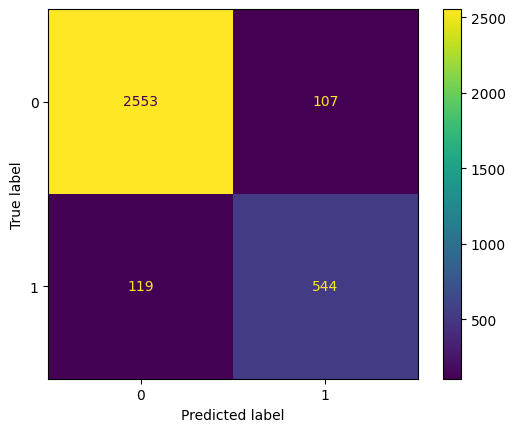

In [5]:
ven_pred = np.array(ven_info["ven"])[y_pred_idx]
ConfusionMatrixDisplay(confusion_matrix(test_paths["ven"], ven_pred)).plot()

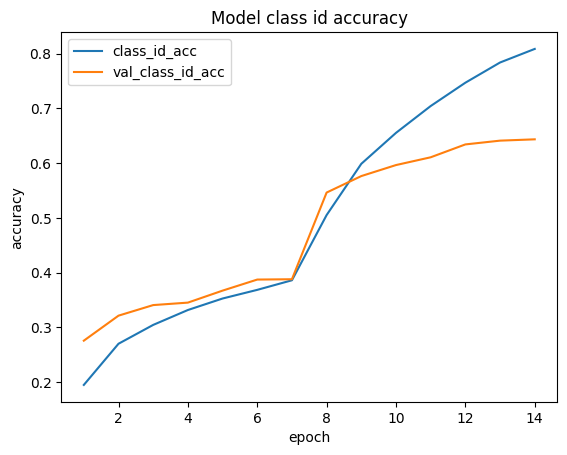

In [6]:
# tudom, gyönyörű
# végleges
train_acc = [0.1949,0.2701,0.3045,0.3317,0.3527,0.3685,0.3860,0.5051,0.5987,0.6552,0.7042,0.7468,0.7837,0.8085]
val_acc =[x / 10000 for x in [2757, 3214,3407,3452,3671,3873,3879,5462,5763,5964,6106,6341,6410,6434]]

plt.plot(range(1, len(train_acc)+1), train_acc)
plt.plot(range(1, len(val_acc)+1), val_acc)
plt.title('Model class id accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['class_id_acc', 'val_class_id_acc'], loc='upper left')